In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math


from gensim.models.word2vec import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Conv1D, MaxPool1D, GlobalMaxPool1D, Embedding, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import PorterStemmer
from sklearn import preprocessing

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [3]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11826       11826  nagpur represent ama you want edit everyone vi...   
11827       11827  youtube channel with 200 marathi songs and lyr...   
11828       11828      maharashtrians are you from north india south   
11829       11829  people who are looking for gdp numbers can che...   
11830       11830  there any difference between maratha and mahar...   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [4]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1119.0   2556.000000  323.171781   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1293.0   4562.000000  373.401259   3916.0   
Borderline Personality     1299.0   5858.000000  375.133310   5209.0   
Depression                 1131.0   7073.000000  326.635883   6508.0   
Schizophernia              1135.0   8206.000000  327.790584   7639.0   
SelfHarm                    746.0   9146.857909  215.894415   8774.0   
Suidal Thought             1198.0  10119.500000  345.977119   9521.0   
neutral                    1112.0  11274.500000  321.151055  10719.0   

                                                              
                             25%      50%       75%      max  
Mental_State                                                  
Addiction                 249.25    498.5    747.75    997.0  
Alcoholism               1247.50   1497.0   1746.50   1996.0  
Anxiety                  2276.50   2556.0   2835.50   3115.0  
Aspergers                3316.50   3516.0   3715.50   3915.0  
Bipolar                  4239.00   4562.0   4885.00   5208.0  
Borderline Personality   5533.50   5858.0   6182.50   6507.0  
Depression               6790.50   7073.0   7355.50   7638.0  
Schizophernia            7922.50   8206.0   8489.50   8773.0  
SelfHarm                 8960.25   9146.5   9333.75   9520.0  
Suidal Thought           9820.25  10119.5  10418.75  10718.0  
neutral                 10996.75  11274.5  11552.25  11830.0

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Unnamed: 0', 'Description', 'Mental_State'], dtype='object')

In [8]:
df.drop(labels='Unnamed: 0', axis=1)

,Description,Mental_State
0,I'm sorry about this post. It's gonna be a who...,Addiction
1,Been getting super high off high amounts of th...,Addiction
2,My brothers been shooting heroin/meth for the ...,Addiction
3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,Ive smoked weed since 8th grade in middle scho...,Addiction
...,...,...
11826,nagpur represent ama you want edit everyone vi...,neutral
11827,youtube channel with 200 marathi songs and lyr...,neutral
11828,maharashtrians are you from north india south,neutral
11829,people who are looking for gdp numbers can che...,neutral


In [9]:
df.head

<bound method NDFrame.head of        Unnamed: 0                                        Description  \
0               0  I'm sorry about this post. It's gonna be a who...   
1               1  Been getting super high off high amounts of th...   
2               2  My brothers been shooting heroin/meth for the ...   
3               3  I rlly need an opinion cuz idk bout this stuff...   
4               4  Ive smoked weed since 8th grade in middle scho...   
...           ...                                                ...   
11826       11826  nagpur represent ama you want edit everyone vi...   
11827       11827  youtube channel with 200 marathi songs and lyr...   
11828       11828      maharashtrians are you from north india south   
11829       11829  people who are looking for gdp numbers can che...   
11830       11830  there any difference between maratha and mahar...   

      Mental_State  
0        Addiction  
1        Addiction  
2        Addiction  
3        Addiction  


In [10]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Mental_State_label"] = lb_make.fit_transform(df["Mental_State"])
df[["Mental_State", "Mental_State_label"]].head(11)



,Mental_State,Mental_State_label
0,Addiction,0
1,Addiction,0
2,Addiction,0
3,Addiction,0
4,Addiction,0
5,Addiction,0
6,Addiction,0
7,Addiction,0
8,Addiction,0
9,Addiction,0


In [11]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11826,11826,nagpur represent ama you want edit everyone vi...,neutral,10
11827,11827,youtube channel with 200 marathi songs and lyr...,neutral,10
11828,11828,maharashtrians are you from north india south,neutral,10
11829,11829,people who are looking for gdp numbers can che...,neutral,10


In [12]:
df.isnull()

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11826,False,False,False,False
11827,False,False,False,False
11828,False,False,False,False
11829,False,False,False,False


In [13]:
df.dropna(inplace=True)

In [14]:
df

,Unnamed: 0,Description,Mental_State,Mental_State_label
0,0,I'm sorry about this post. It's gonna be a who...,Addiction,0
1,1,Been getting super high off high amounts of th...,Addiction,0
2,2,My brothers been shooting heroin/meth for the ...,Addiction,0
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction,0
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction,0
...,...,...,...,...
11826,11826,nagpur represent ama you want edit everyone vi...,neutral,10
11827,11827,youtube channel with 200 marathi songs and lyr...,neutral,10
11828,11828,maharashtrians are you from north india south,neutral,10
11829,11829,people who are looking for gdp numbers can che...,neutral,10


In [15]:
text = df['Description'].values.tolist()

In [16]:
df.groupby("Mental_State").describe()

Unnamed: 0                                     \
                            count          mean         std      min   
Mental_State                                                           
Addiction                   998.0    498.500000  288.242086      0.0   
Alcoholism                  999.0   1497.000000  288.530761    998.0   
Anxiety                    1119.0   2556.000000  323.171781   1997.0   
Aspergers                   799.0   3516.000000  230.795725   3117.0   
Bipolar                    1293.0   4562.000000  373.401259   3916.0   
Borderline Personality     1299.0   5858.000000  375.133310   5209.0   
Depression                 1131.0   7073.000000  326.635883   6508.0   
Schizophernia              1135.0   8206.000000  327.790584   7639.0   
SelfHarm                    746.0   9146.857909  215.894415   8774.0   
Suidal Thought             1198.0  10119.500000  345.977119   9521.0   
neutral                    1112.0  11274.500000  321.151055  10719.0   

                                                              \
                             25%      50%       75%      max   
Mental_State                                                   
Addiction                 249.25    498.5    747.75    997.0   
Alcoholism               1247.50   1497.0   1746.50   1996.0   
Anxiety                  2276.50   2556.0   2835.50   3115.0   
Aspergers                3316.50   3516.0   3715.50   3915.0   
Bipolar                  4239.00   4562.0   4885.00   5208.0   
Borderline Personality   5533.50   5858.0   6182.50   6507.0   
Depression               6790.50   7073.0   7355.50   7638.0   
Schizophernia            7922.50   8206.0   8489.50   8773.0   
SelfHarm                 8960.25   9146.5   9333.75   9520.0   
Suidal Thought           9820.25  10119.5  10418.75  10718.0   
neutral                 10996.75  11274.5  11552.25  11830.0   

                       Mental_State_label                                     \
                                    count  mean  std   min   25%   50%   75%   
Mental_State                                                                   
Addiction                           998.0   0.0  0.0   0.0   0.0   0.0   0.0   
Alcoholism                          999.0   1.0  0.0   1.0   1.0   1.0   1.0   
Anxiety                            1119.0   2.0  0.0   2.0   2.0   2.0   2.0   
Aspergers                           799.0   3.0  0.0   3.0   3.0   3.0   3.0   
Bipolar                            1293.0   4.0  0.0   4.0   4.0   4.0   4.0   
Borderline Personality             1299.0   5.0  0.0   5.0   5.0   5.0   5.0   
Depression                         1131.0   6.0  0.0   6.0   6.0   6.0   6.0   
Schizophernia                      1135.0   7.0  0.0   7.0   7.0   7.0   7.0   
SelfHarm                            746.0   8.0  0.0   8.0   8.0   8.0   8.0   
Suidal Thought                     1198.0   9.0  0.0   9.0   9.0   9.0   9.0   
neutral                            1112.0  10.0  0.0  10.0  10.0  10.0  10.0   

                              
                         max  
Mental_State                  
Addiction                0.0  
Alcoholism               1.0  
Anxiety                  2.0  
Aspergers                3.0  
Bipolar                  4.0  
Borderline Personality   5.0  
Depression               6.0  
Schizophernia            7.0  
SelfHarm                 8.0  
Suidal Thought           9.0  
neutral                 10.0

In [17]:
df["Mental_State"].value_counts()

Borderline Personality    1299
Bipolar                   1293
Suidal Thought            1198
Schizophernia             1135
Depression                1131
Anxiety                   1119
neutral                   1112
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

C:\Users\moshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


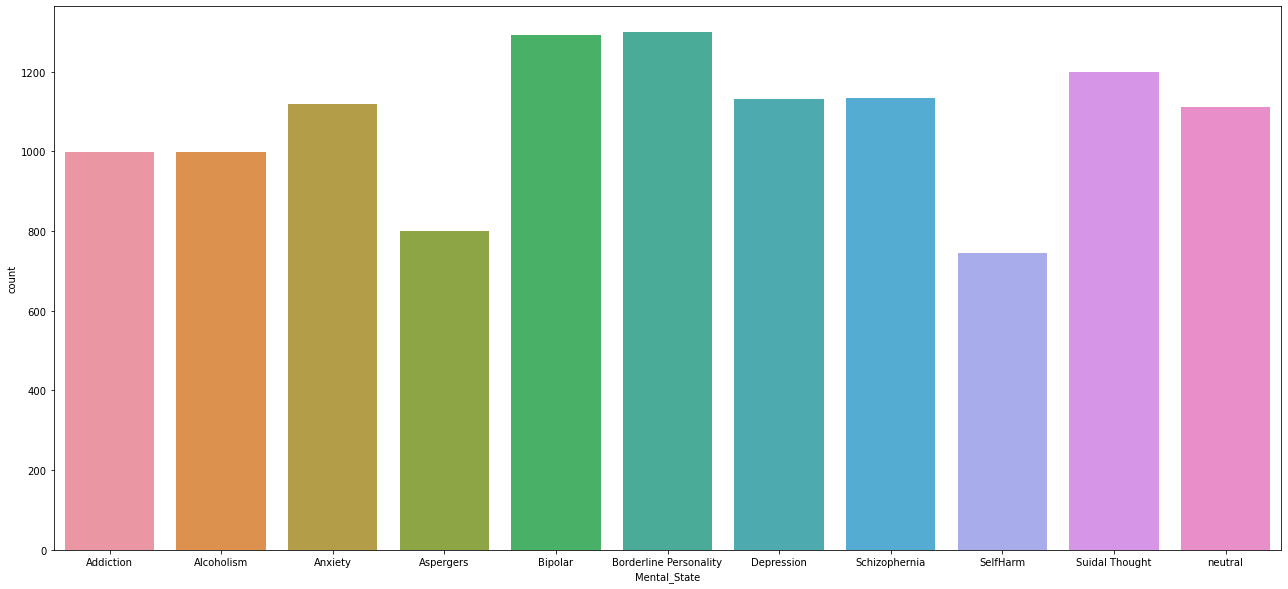

In [18]:
plt.subplots(figsize=(22,10))
sns.countplot(df["Mental_State"])
plt.show()

In [19]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

26163


In [20]:
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup

import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer


In [21]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [22]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(denoise_text)

In [23]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on description column
df['Description']=df['Description'].apply(remove_special_characters)

In [24]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on description column
df['Description']=df['Description'].apply(simple_stemmer)

In [25]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Description']=df['Description'].apply(remove_stopwords)

{'m', 'me', 'these', 'should', "hasn't", "you're", 'then', "shan't", "aren't", "you've", 'those', 'few', 'his', 'as', 'whom', 'at', 'now', 'over', "she's", 'having', 'but', "hadn't", 'does', 'we', 'theirs', 'was', 'nor', 'up', 'shan', 'more', 'ourselves', 'here', 'didn', 'not', 'no', 'too', 'can', 'll', 'what', 'out', 'mustn', 'for', 'd', 'how', 'it', 'aren', 'him', 'who', 'further', 'than', 'by', 'of', "haven't", 'hadn', 're', 'all', 'wouldn', 'will', 'her', 'with', 'do', 'through', 'there', 'only', 't', 'off', "you'll", 'during', 'don', "shouldn't", 'if', 'its', "won't", 'or', 'until', 'my', 'above', 'himself', 'just', 'yourselves', 'did', 'has', 'won', 'ain', 'in', 'your', 'such', 'themselves', 'once', 'between', 'hasn', 'while', 'doing', 'itself', 'they', 'the', 'y', 'being', 'any', 'our', 'and', "should've", 'needn', 'is', 'same', 'from', 'under', 'o', 'ma', 'on', 'when', 'which', 'herself', 'other', 'before', 'isn', 'where', 'so', 'am', 'been', 'very', "mightn't", 'a', "couldn't"

In [26]:
longest_string = max(df["Description"], key=len)
print(len(longest_string))

15023


In [27]:
text = df["Description"]

In [28]:
emotion =df["Mental_State"]

In [29]:
mes = []
for i in df['Description']:
    mes.append(i.split())
print(mes[:2])

[['im', 'sorri', 'thi', 'post', 'gonna', 'whole', 'lot', 'hand', 'wring', 'mental', 'masturb', 'never', 'seem', 'abl', 'process', 'thi', 'meaning', 'way', 'make', 'attend', 'na', 'aa', 'meet', 'real', 'pain', 'dont', 'seem', 'kind', 'sick', 'everyon', 'els', 'describ', 'im', 'troubl', 'relat', 'anyon', 'dont', 'know', 'like', 'normal', 'function', 'peopl', 'know', 'like', 'peopl', 'tast', '1', 'beer', 'come', 'next', 'month', 'jail', 'charg', 'rhino', 'militari', 'convoy', 'dress', 'wehrmact', 'univorm', 'instead', 'thi', 'allencompass', 'diseas', 'peopl', 'speak', 'group', 'like', 'slight', 'polyaddict', 'part', 'maladapt', 'pattern', 'ive', 'learn', 'due', 'adhd', 'crave', 'themselv', 'way', 'lessen', 'due', 'start', 'strattera', 'time', 'ive', 'upteenth', 'time', 'decid', 'sober', 'bingedrink', 'money', 'away', 'onc', 'ween', 'unaid', 'realli', 'need', 'factor', 'play', 'scale', 'one', 'much', 'addict', 'horseshit', 'wa', 'condenc', 'last', 'paragraph', 'opinion', 'im', 'self', 'awa

In [30]:
word2vec_model = Word2Vec(mes, vector_size=300, window=3, min_count=1, workers=16)
print(word2vec_model)

Word2Vec(vocab=21896, vector_size=300, alpha=0.025)


In [31]:
token = Tokenizer(7229)
token.fit_on_texts(df['Description'])
text = token.texts_to_sequences(df['Description'])
text = pad_sequences(text, 75)
print(text[:2])

[[   5 2504  210 3691 1127   11  335  311  652  628  765   44 2318  311
    30 6082   12   11   12  298  245 5528  271  110  205 4469   15   35
  1774  299 2120   23   33  120    3   54 2714  841    1  186  538  116
   119   36   92  160   10  393    4    5 4750  273   12   10  126    4
   759  144  498  409    2   12  137    8 1041 5090 1976  207 1829   92
     5   35    7   20  631]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    7  443  216  216  582 2550 3449  254   72  455   16   30
    40  507  461  125   28   83   16    7   30 1211  802  439  458  669
   769 3337 5091    7  216    5  628  216    4  696    6   15  114   17
  6878  206 2662  943 6083]]


In [32]:
x_train, x_test, y_train, y_test = train_test_split(np.array(text), df["Mental_State"], test_size=0.2, stratify=df["Mental_State"])

Y_pre = df['Mental_State']
target_names = list(set(Y_pre))

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
import seaborn as sn

Test set accuracy 0.1893491124260355
                        precision    recall  f1-score   support

               Bipolar       0.11      0.12      0.11       199
         Schizophernia       0.11      0.08      0.09       200
              SelfHarm       0.12      0.07      0.09       224
Borderline Personality       0.14      0.12      0.13       160
            Depression       0.14      0.15      0.15       259
        Suidal Thought       0.17      0.08      0.11       260
            Alcoholism       0.11      0.05      0.07       226
               Anxiety       0.11      0.02      0.03       227
             Addiction       0.10      0.49      0.17       149
             Aspergers       0.09      0.03      0.05       240
               neutral       0.52      0.98      0.68       222

              accuracy                           0.19      2366
             macro avg       0.16      0.20      0.15      2366
          weighted avg       0.16      0.19      0.15      2366



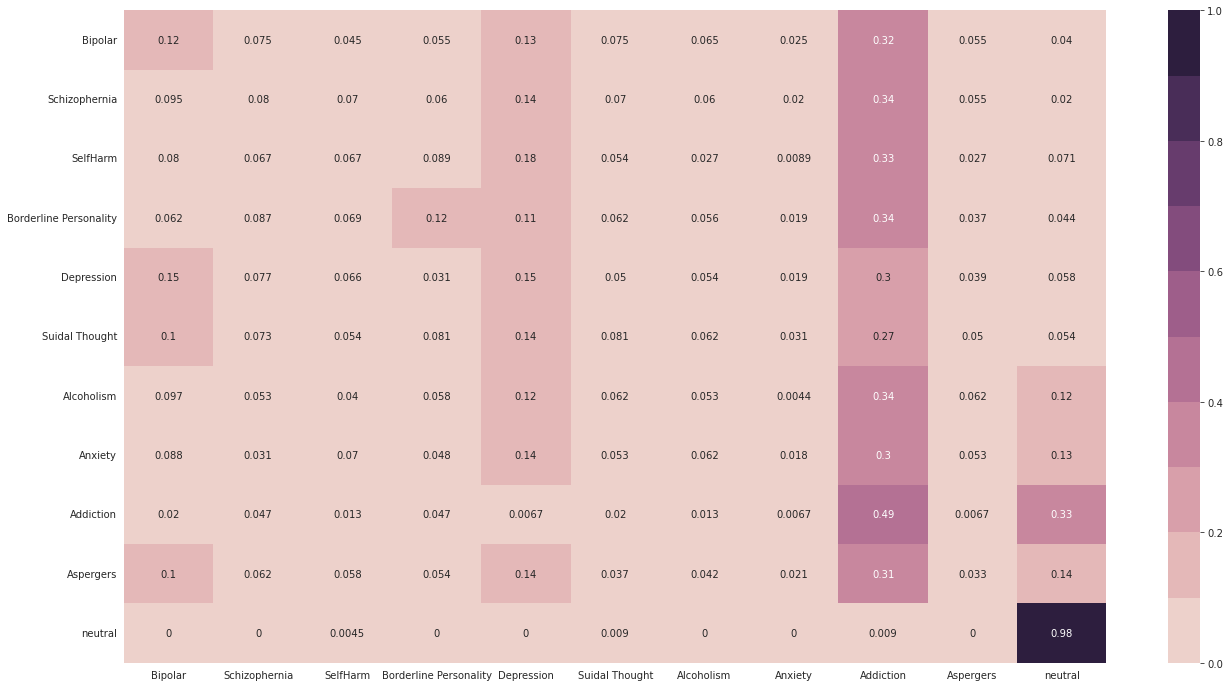

In [35]:
classifer = MultinomialNB()
classifer.fit(x_train, y_train)
y_pred = classifer.predict(x_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()

In [36]:
from xgboost import XGBClassifier

C:\Users\moshi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test set accuracy 0.23541842772612004
                        precision    recall  f1-score   support

               Bipolar       0.21      0.14      0.17       199
         Schizophernia       0.21      0.18      0.20       200
              SelfHarm       0.17      0.15      0.16       224
Borderline Personality       0.18      0.08      0.11       160
            Depression       0.15      0.20      0.17       259
        Suidal Thought       0.17      0.25      0.20       260
            Alcoholism       0.16      0.17      0.17       226
               Anxiety       0.14      0.14      0.14       227
             Addiction       0.23      0.17      0.19       149
          

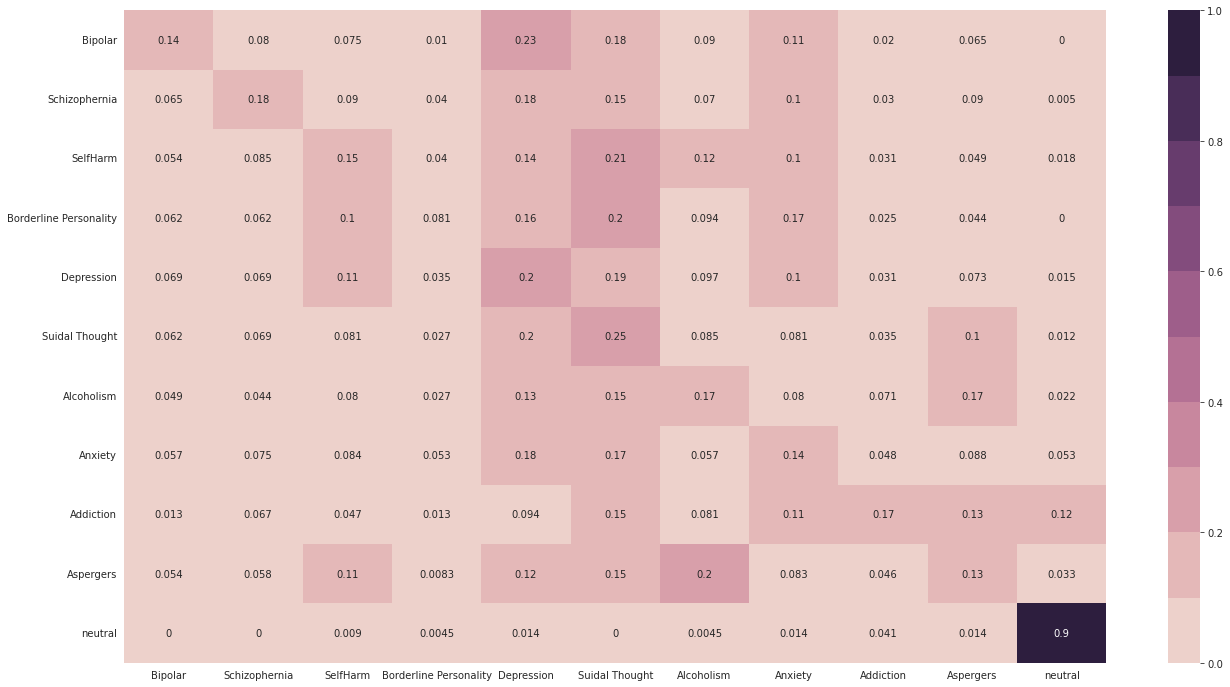

In [37]:
classifer = XGBClassifier()
classifer.fit(x_train, y_train)
y_pred = classifer.predict(x_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  